# Natural Language Processing- NLP

NLP is a field concerned with the ability of a computer to understand, analyse, manipulate and potentially generate human language.

NLP is a broad umbrella that encompasses many topics. Some of them are sentiment analysis, topic modelling, text classification etc

NLTK- Natural Language Toolkit- The NLTK is the most utilised package for handling natural language processing tasks. It is an open source library.

# Spam/Ham Classification using Natural Language Processing

In [4]:
# !pip install NLTK

import nltk
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
dataset= pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'SMSSpamCollection.tsv'

In [28]:
dataset['body_text'][0]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [29]:
dataset['body_text'][1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

What is the shape of the data

In [30]:
print("Input data has {} rows and {} columns".format(len(dataset),len(dataset.columns)))

Input data has 5568 rows and 2 columns


How many spam/ham are there

In [31]:
print("Out of {} rows, {} are spam. {} are ham".format(len(dataset),len(dataset[dataset['label']=='spam']),
                                                      len(dataset[dataset['label']=='ham'])))

Out of 5568 rows, 746 are spam. 4822 are ham


How much missing data is there

In [32]:
print("Number of null in label: {}".format(dataset['label'].isnull().sum()))

print("Number of null in text: {}".format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


Preprocessing text data- Cleaning up the text data is necessary to highlight attributes that you are going to use in ML algorithms.

Cleaning or preprocessing the data consists of a number of steps

Remove Punctuation

Tokenization

Remove Stopwords

Lemmatize/Stemming

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

dataset['body_text_clean']=dataset['body_text'].apply(lambda x:remove_punct(x))

dataset.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


Tokenization- Tokenizing is splitting some string or sentence into a list of words

In [35]:
import re

def tokenize(text):
    tokens=re.split('\W',text)
    return tokens

dataset['body_text_tokenized']=dataset['body_text_clean'].apply(lambda x:tokenize(x.lower()))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


Remove Stopwords- These are comonly used words like the, and, but, if that don't contribut much to the meaning of a sentence.

In [36]:
stopwords= nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [37]:
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords]
    return text

dataset['body_text_nostop']=dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


Stemming- Stemming is the process of reducing inflected or derived owrds to their stem or root.

In [38]:
ps=nltk.PorterStemmer()

def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

dataset['body_text_stemmed']=dataset['body_text_nostop'].apply(lambda x:stemming(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


Lemmatization- It is the process of grouping together the inflected forms of a word so they can be analysed as a single term, identified by the word's lemma.

For e.g. type, typing anf typed are forms of the same lemma type.

In [39]:
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text

dataset['body_text_lemmatized']=dataset['body_text_nostop'].apply(lambda x:lemmatizing(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


Vectorization- This is defined as the process of encoding text as integers to create feature vectors. In out ontext we will be taking inividual text messages and converting it to a numeric vector that represents that text message.

Count Vectorization- This creates a document-term matrix where the entry of each cell will be a count of the number of times that word occured in that document.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

count_vect= CountVectorizer(analyzer=clean_text)

X_count=count_vect.fit_transform(dataset['body_text'])

print(X_count.shape)

(5568, 8107)



Apply count vectorizer to a smaller sample

In [41]:
data_sample=dataset[0:20]

count_vect_sample= CountVectorizer(analyzer=clean_text)
X_count_sample= count_vect_sample.fit_transform(data_sample['body_text'])

print(X_count_sample.shape)

(20, 202)


Sparse Matrix- A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the lcoations of the non-zero elements.

In [42]:
X_count_sample

<20x202 sparse matrix of type '<class 'numpy.int64'>'
	with 231 stored elements in Compressed Sparse Row format>

In [43]:
x_counts_df= pd.DataFrame(X_count_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
import warnings
warnings.filterwarnings("ignore")

x_counts_df.columns= count_vect_sample.get_feature_names()
x_counts_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


TF-IDF (Term Frequency, Inverse DOcument Frequency)- Creates a document term amtrix where the column represents single unique terms(unirams) but the cell represents a weighting meant to represent how important a word is to a document.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf= tfidf_vect.fit_transform(dataset['body_text'])

print(X_tfidf.shape)

(5568, 8107)


Apply TfidfVectorizer to a smaller sample

In [46]:
data_sample=dataset[0:20]

tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample=tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(X_tfidf_sample.shape)

(20, 202)


In [47]:
x_tfidf_df= pd.DataFrame(X_tfidf_sample.toarray())
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names()
x_tfidf_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.180710,0.000000,0.000000,0.227832,0.000000,0.000000,0.000000,0.000000,0.227832,0.000000,...,0.227832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature Engineering: Feature Creation

In [48]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Create feature for text message length

In [49]:
dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))

dataset.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


create feature for % of text that is punctuation

In [50]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


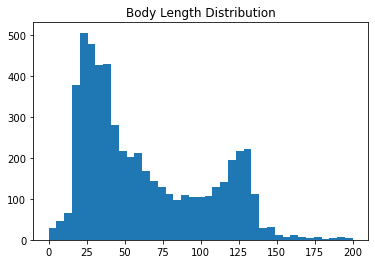

In [51]:
import matplotlib.pyplot as plt
import numpy as np

bins=np.linspace(0,200,40)

plt.hist(dataset['body_len'],bins)
plt.title('Body Length Distribution')
plt.show()

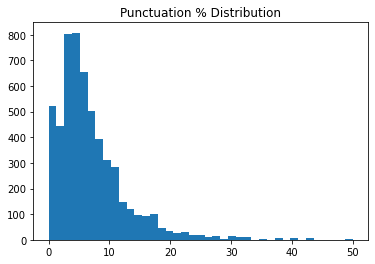

In [52]:
bins=np.linspace(0,50,40)

plt.hist(dataset['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()

# Building Machine Learning Classifiers using Random Forest Model

In [53]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [54]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [55]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))
dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [56]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['body_text'])

In [57]:
X_features=pd.concat([dataset['body_len'],dataset['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model using K-Fold cross validation

In [58]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

rf=RandomForestClassifier(n_jobs=1)
k_fold=KFold(n_splits=5)

cross_val_score(rf, X_features, dataset['label'],cv=k_fold, scoring='accuracy',n_jobs=1)

array([0.97755835, 0.97666068, 0.97307002, 0.96585804, 0.96945193])

# Model using Train Test Split

In [59]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test= train_test_split(X_features, dataset['label'],test_size=0.3,random_state=0)

In [61]:
rf=RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=-1)
rf_model=rf.fit(X_train, y_train)

In [62]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.05076587181684123, 'body_len'),
 (0.03562763533973613, 1804),
 (0.03369030583784368, 7353),
 (0.026169361467375796, 3135),
 (0.02553135856286806, 2032),
 (0.022975817209814793, 4799),
 (0.019592811190976733, 5727),
 (0.01706216400789735, 6288),
 (0.015809414019885993, 6749),
 (0.015590992486004015, 7030)]

In [63]:
y_pred= rf_model.predict(X_test)

precision, recall, fscore, support=score(y_test, y_pred, pos_label='spam',average='binary')

In [64]:
print('Precision {} / Recall {} / Accuracy {}'.format(round(precision,3),
                                                     round(recall,3),
                                                     round((y_pred==y_test).sum()/len(y_pred),3)))

Precision 1.0 / Recall 0.56 / Accuracy 0.936


# Movie Recommender System

Recommender Systems, also labelled as recommendation systems, are statistical algorithms that recommend products to users based on similarities between the buying trends of various user or similarities between the products.

Collaborative Filtering- The process used to calculate similarities between the buying trends of various users or similarities between products is called collaborative filtering.

User based collaborative filtering- If two user X and Y, like products A and B and there is another user Z who likes product A, then the product B will also be recommended to user Z

Item-based collaborative filtering- In this products are recommended based on similarities between themselves. For instance if a user likes product A and product A has properties X and Y, another product B with properties X and Y will also be recommended to the user.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

The dataset contains around 100,000 movie reviews applied to 9,000 movies by 600 users

In [4]:
movie_ids_titles=pd.read_csv("movies.csv")

movie_ids_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movie_ids_titles.shape

(9742, 3)

In [6]:
movie_ids_ratings=pd.read_csv("ratings.csv")

movie_ids_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movie_ids_ratings.shape

(100836, 4)

Data Preprocessing- We need a dataframe that consists of userId, movieId, title and ratings

In [8]:
movie_ids_titles.drop(['genres'],inplace=True,axis=1)

movie_ids_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
movie_ids_ratings.drop(["timestamp"],inplace=True,axis=1)

movie_ids_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [12]:
merged_movie_df= pd.merge(movie_ids_ratings, movie_ids_titles, on='movieId')

merged_movie_df.head(15)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
5,18,1,3.5,Toy Story (1995)
6,19,1,4.0,Toy Story (1995)
7,21,1,3.5,Toy Story (1995)
8,27,1,3.0,Toy Story (1995)
9,31,1,5.0,Toy Story (1995)


Data Visualisation- Let's first group the dataset by title and see whhat information we can get regarding the ratings of movies.

In [11]:
merged_movie_df.groupby('title').describe()

userId                          \
                                           count        mean         std   
title                                                                      
'71 (2014)                                   1.0  610.000000         NaN   
'Hellboy': The Seeds of Creation (2004)      1.0  332.000000         NaN   
'Round Midnight (1986)                       2.0  354.500000   31.819805   
'Salem's Lot (2004)                          1.0  345.000000         NaN   
'Til There Was You (1997)                    2.0  229.000000  164.048773   
...                                          ...         ...         ...   
eXistenZ (1999)                             22.0  389.954545  167.161022   
xXx (2002)                                  24.0  272.916667  174.297576   
xXx: State of the Union (2005)               5.0  386.000000  148.801882   
¡Three Amigos! (1986)                       26.0  279.807692  193.794947   
À nous la liberté (Freedom for Us) (1931)    1.0  527.000000         NaN   

                                                                         \
                                             min     25%    50%     75%   
title                                                                     
'71 (2014)                                 610.0  610.00  610.0  610.00   
'Hellboy': The Seeds of Creation (2004)    332.0  332.00  332.0  332.00   
'Round Midnight (1986)                     332.0  343.25  354.5  365.75   
'Salem's Lot (2004)                        345.0  345.00  345.0  345.00   
'Til There Was You (1997)                  113.0  171.00  229.0  287.00   
...                                          ...     ...    ...     ...   
eXistenZ (1999)                             95.0  278.25  419.5  509.25   
xXx (2002)                                   9.0  131.25  240.5  418.50   
xXx: State of the Union (2005)             232.0  274.00  382.0  432.00   
¡Three Amigos! (1986)                        1.0  101.25  260.5  441.25   
À nous la liberté (Freedom for Us) (1931)  527.0  527.00  527.0  527.00   

                                                 movieId            ...  \
                                             max   count      mean  ...   
title                                                               ...   
'71 (2014)                                 610.0     1.0  117867.0  ...   
'Hellboy': The Seeds of Creation (2004)    332.0     1.0   97757.0  ...   
'Round Midnight (1986)                     377.0     2.0   26564.0  ...   
'Salem's Lot (2004)                        345.0     1.0   27751.0  ...   
'Til There Was You (1997)                  345.0     2.0     779.0  ...   
...                                          ...     ...       ...  ...   
eXistenZ (1999)                            608.0    22.0    2600.0  ...   
xXx (2002)                                 610.0    24.0    5507.0  ...   
xXx: State of the Union (2005)             610.0     5.0   33158.0  ...   
¡Three Amigos! (1986)                      599.0    26.0    2478.0  ...   
À nous la liberté (Freedom for Us) (1931)  527.0     1.0    5560.0  ...   

                                                              rating  \
                                                75%       max  count   
title                                                                  
'71 (2014)                                 117867.0  117867.0    1.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0    1.0   
'Round Midnight (1986)                      26564.0   26564.0    2.0   
'Salem's Lot (2004)                         27751.0   27751.0    1.0   
'Til There Was You (1997)                     779.0     779.0    2.0   
...                                             ...       ...    ...   
eXistenZ (1999)                              2600.0    2600.0   22.0   
xXx (2002)                                   5507.0    5507.0   24.0   
xXx: State of the Union (2005)              33158.0   33158.0    5.0   
¡Three Amig

In [13]:
merged_movie_df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

Let's sort the movie titles by the descending rder of the average user ratings

In [14]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

Let's now print the movies in the descending order of their rating counts

In [15]:
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

A movie which is rated by large number of people is usually a good movie

Let's create a dataframe that shows the title, mean rating and the rating counts

In [16]:
movie_rating_mean_count= pd.DataFrame(columns=['rating_mean','rating_count'])

movie_rating_mean_count["rating_mean"]=merged_movie_df.groupby('title')['rating'].mean()

movie_rating_mean_count["rating_count"]=merged_movie_df.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


The above dataframe contains movie title, average rating (ratings mean) and the number of rating_counts

We will plot a histogram to see how the average ratings are distributed.

<Axes: >

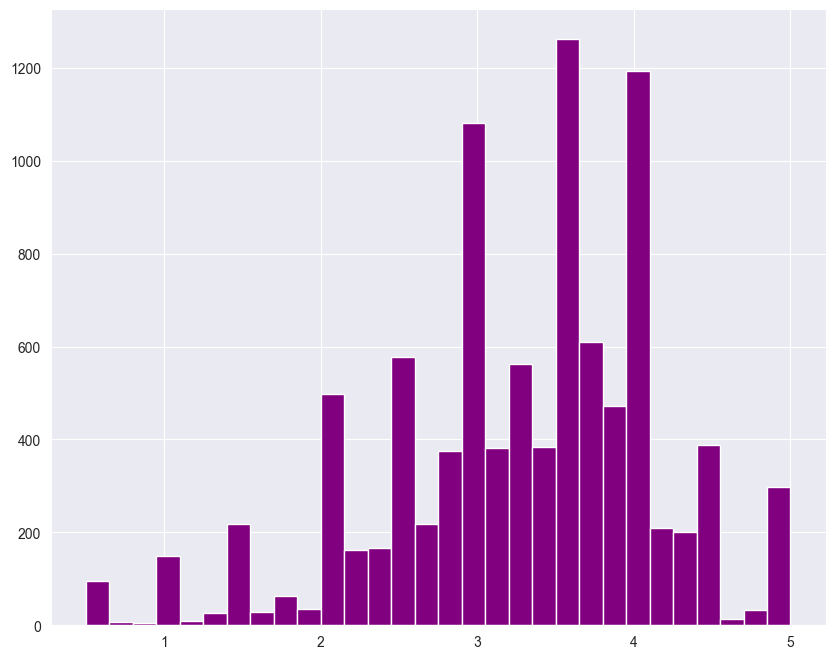

In [17]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_mean'].hist(bins=30, color='purple')

In the above plot, most of the movies have an average rating between 3 and 4

Distribution for rating counts

<Axes: >

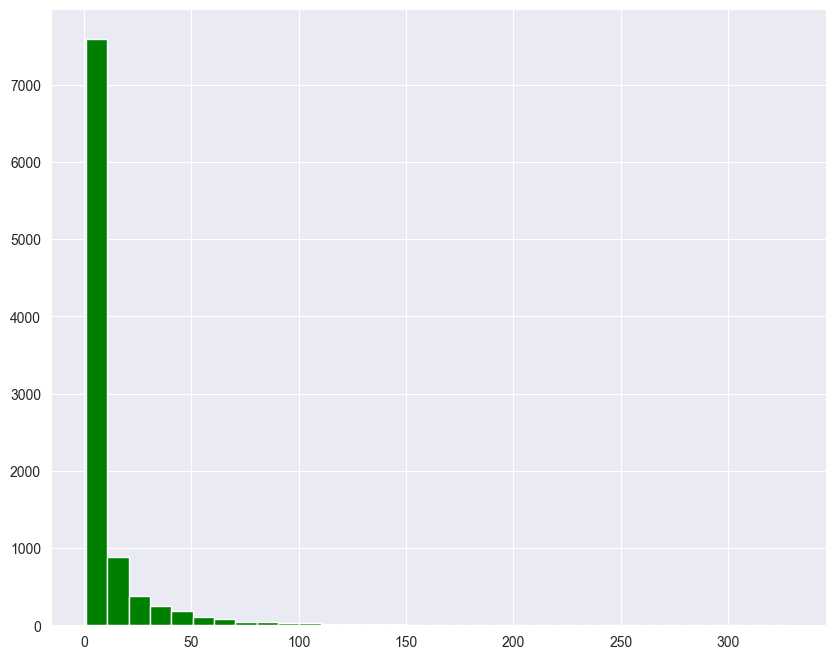

In [18]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count["rating_count"].hist(bins=33, color="green")

There are around 7000 movies with less than 10 rating counts. The number of movies decrease with an increase in ratings counts. Movies with more than 50 rating are very few.

It is also nteresting to see the relationship between mean ratings and rating counts of a movie

<Axes: xlabel='rating_mean', ylabel='rating_count'>

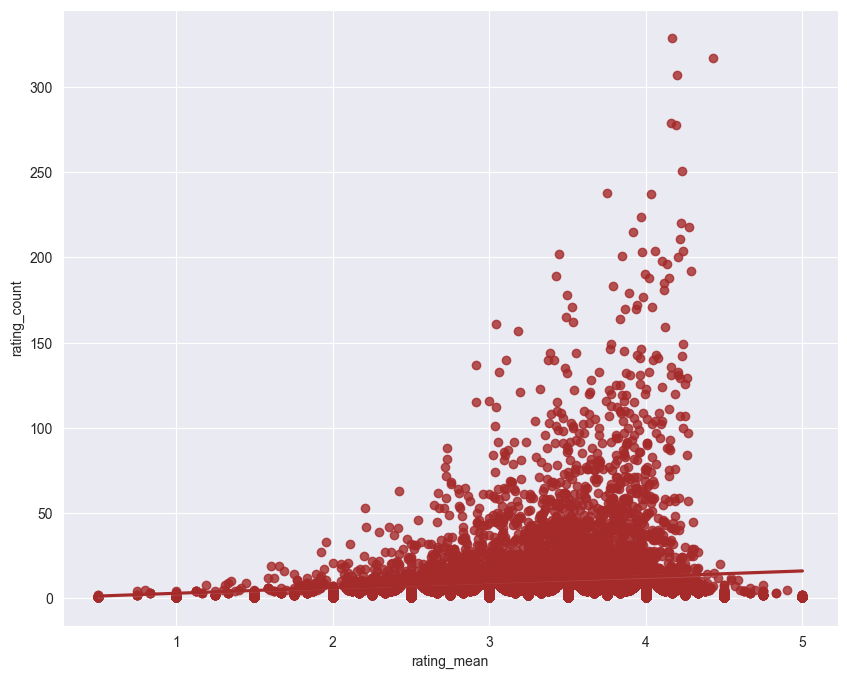

In [19]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

sns.regplot(x="rating_mean",y="rating_count",data=movie_rating_mean_count, color="brown")

From the above graph in the top right portion, you can see that the movies witha higher number of rating counts tend to have higher mean ratings as well.

Let's sort our dataset by rating counts and see the average ratings of the movies with the top 5 highest number of ratings

In [64]:
movie_rating_mean_count.sort_values("rating_count",ascending=False).head()
# movie_rating_mean_count.count{"Mortal Kombat (1995)"}

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [2]:
# Replace 'specific_movie_title' with the actual title or ID of the movie you want to find.
specific_movie = "Mortal Kombat (1995)"

# Filter the DataFrame to find the row with that specific movie.
specific_movie_rating_count = movie_rating_mean_count[movie_rating_mean_count['title'] == specific_movie]

print(movie_rating_mean_count.columns)

NameError: name 'movie_rating_mean_count' is not defined

# Item Based Collaborative Filtering

In item based collaborative filtering, products are recommended based on common characteristics.

The first step is to create a dataframe where each movie is represented by a column and rows contain user raings for movies.

In [21]:
user_movie_rating_matrix= merged_movie_df.pivot_table(index="userId",columns="title",values="rating")

user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


The Dataset contains 610 unique users and 9,719 unique movies

Now we will find the movie recommendation based on a single movie and then based on multiplt movies.

Finding recommendations based on a single movie- Suppose we want to find the recommendation based on the movie Pulp Fiction.

First we will filter the column that contains the user ratings for the movie.

In [25]:
pulp_fiction_ratings= user_movie_rating_matrix["Pulp Fiction (1994)"]

Next, we will find the correlation between the user ratings of all the movies and the user ratings for the movie pulp fiction

In [26]:
pulp_fiction_correlations=pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=["pf_corr"])

c:\Users\mradu\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mradu\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [27]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head(500)

,pf_corr
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.000000
Azumi (2003),1.000000
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.000000
"War Zone, The (1999)",1.000000
"Wolfman, The (2010)",1.000000
...,...
Land of the Dead (2005),0.857537
Hud (1963),0.855186
Searching for Sugar Man (2012),0.855186


Correlation itself is not giving meaningful results, one solution to this problem can be that in addition to the correlation between the movies, we also use rating counts, for the correlated movie as a criteria for finding the best recommendation.

In [28]:
pulp_fiction_correlations=pulp_fiction_correlations.join(movie_rating_mean_count["rating_count"])

pulp_fiction_correlations.tail()

,pf_corr,rating_count
title,,
eXistenZ (1999),-0.148377,22
xXx (2002),0.019162,24
xXx: State of the Union (2005),0.559017,5
¡Three Amigos! (1986),-0.029879,26
À nous la liberté (Freedom for Us) (1931),NaN,1


The pf_corr column contains some NaN values. This is because there can be movies that are rated by users who did not rate Pulp Fiction (1994). In such cases, correlation will be null

We will remove all the movies with null correlation with Pulp Fiction (1994)

In [29]:
pulp_fiction_correlations.dropna(inplace=True)

In [30]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Azumi (2003),1.0,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2
"War Zone, The (1999)",1.0,2
"Wolfman, The (2010)",1.0,2


A better way is to find the movies with the rating counts of atlease 50 and having the highest correlation with Pulp Fiction (1994)

In [31]:
pulp_fiction_correlations_50=pulp_fiction_correlations[pulp_fiction_correlations['rating_count']>50]

pulp_fiction_correlations_50.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73


Finding the recommendation based on multiple movies- In this we will see how to recommend movies to a user based on his ratings of multiple movies. The first step is to create a dataframe, which contains a correlation between all the movies in our dataset in the form of a matrix.

In [80]:
all_movie_correlations=user_movie_rating_matrix.corr(method="pearson",min_periods=50)

In [81]:
all_movie_correlations.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
test1 = all_movie_correlations["Forrest Gump (1994)"].dropna(inplace=False)
test1.sort_values(ascending=False).head()

title
Forrest Gump (1994)          1.000000
Mr. Holland's Opus (1995)    0.652144
Pocahontas (1995)            0.550118
Big (1988)                   0.492351
Good Will Hunting (1997)     0.484042
Name: Forrest Gump (1994), dtype: float64

Now supose a new user logs into the website. The user has already watched three movies and has given ratings to those movies.

In [100]:
movie_data=[['Interstellar (2014)',5.0]]

test_movies=pd.DataFrame(movie_data,columns=['Movie_Name','Movie_Rating'])

test_movies.head()

,Movie_Name,Movie_Rating
0,Interstellar (2014),5.0


We will be recommending movies from our dataset based on the ratings by a new user for these three movies

In [101]:
print(test_movies['Movie_Name'][0])
print(test_movies['Movie_Rating'][0])

Interstellar (2014)
5.0


From all_movie_correlations dataframe, let's obtain correlation values for the movies related to Forrest Gump (1994)

In [102]:
all_movie_correlations['Forrest Gump (1994)'].dropna()

title
2001: A Space Odyssey (1968)                  0.191558
300 (2007)                                    0.321523
40-Year-Old Virgin, The (2005)                0.156517
Ace Ventura: Pet Detective (1994)             0.137870
Ace Ventura: When Nature Calls (1995)         0.421868
                                                ...   
Willy Wonka & the Chocolate Factory (1971)    0.195081
Wizard of Oz, The (1939)                      0.162368
X-Men (2000)                                  0.200786
X2: X-Men United (2003)                       0.246717
Young Frankenstein (1974)                     0.230049
Name: Forrest Gump (1994), Length: 313, dtype: float64

Next, we will iterate through the three movies in the test_movie dataframe, find the correlated movies, and then multiply the correlation of all he correlated movies with the atings of the input movie.

The correlated movies, alongwith the weighted correlation are appended to an empty series named recommended movies.

In [103]:
recommended_movies_list = []

for i in range(len(test_movies)):
    # Extract the relevant movie correlation data and drop NaNs
    movie = all_movie_correlations[test_movies['Movie_Name'][i]].dropna()
    
    # Multiply by the movie rating
    movie = movie.map(lambda movie_corr: movie_corr * test_movies["Movie_Rating"][i])
    
    # Append the resulting Series to the list
    recommended_movies_list.append(movie)

In [104]:
recommended_movies = pd.concat(recommended_movies_list)

# Sort the combined Series in descending order and get the top values
recommended_movies_sorted = recommended_movies.sort_values(ascending=False)

# Display the top values
print(recommended_movies_sorted.head(30))

title
Interstellar (2014)                                          5.000000
Matrix, The (1999)                                           2.995202
Inception (2010)                                             2.455760
Forrest Gump (1994)                                          1.667973
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.984156
Shawshank Redemption, The (1994)                             0.971855
Dark Knight, The (2008)                                      0.861160
Lord of the Rings: The Return of the King, The (2003)        0.650161
Name: Interstellar (2014), dtype: float64
